<!-- ![Alt Text](https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/header.png) -->

<div style="display: flex; justify-content: flex-start; align-items: center;">
   <a href="https://colab.research.google.com/github/msfasha/307304-Data-Mining/blob/main/20242/Part%201-Regression/1-3-converting%20categorical%20to%20numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
   <a href="https://uopstdedu-my.sharepoint.com/:v:/g/personal/mohammed_fasha_uop_edu_jo/EZs7kLSUJypIvr5l9qM0fvkB0BOn-d99Fw-4JXdonCvSzw?nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=pEhpuW" target="_blank">
   <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/video_icon.png" alt="Recorded Video Lecture" style="height: 75px;margin-left:20px;">
    </a>
</div>

# Converting Categorical Values into Numerical ones
## Topics and Outcomes
- Converting categorical values into numerical values


## Introduction
When working with machine learning models, especially linear regression or most algorithms, **categorical variables** need to be converted into **numerical** ones because models usually require numeric input to compute distances, apply mathematical transformations, etc.

We present belowe some common techniques to convert categorical variables into numerical ones, along with examples using `scikit-learn`.

### 1. **One-Hot Encoding**
Converts each category into a new binary column (0 or 1), with a column for each unique category in the original variable.
   
**Example with Scikit-Learn**

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample dataset
df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']})

# One-Hot Encoding using scikit-learn
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[['Color']])
print(one_hot_encoded)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


Notes:
- **Use Case**: Best for nominal (unordered) categorical variables with a limited number of unique values.
- **Pros**: Captures categorical relationships without implying any order.
- **Cons**: Increases dimensionality significantly, especially with high-cardinality features (many unique categories).

### 2. **Label Encoding**
Assigns each unique category an integer. Categories are replaced with integer values, but the encoding does not imply order.

**Example with Scikit-Learn**

In [2]:
from sklearn.preprocessing import LabelEncoder

# Sample dataset
df = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small']})

# Label Encoding using scikit-learn
label_encoder = LabelEncoder()
df['Size_Label_Encoded'] = label_encoder.fit_transform(df['Size'])
print(df)

     Size  Size_Label_Encoded
0   Small                   2
1  Medium                   1
2   Large                   0
3  Medium                   1
4   Small                   2


Notes:
   - **Use Case**: Primarily for nominal categorical variables, especially when high cardinality makes one-hot encoding impractical.
   - **Pros**: Simple and does not increase dimensionality.
   - **Cons**: Can mislead models that interpret integers as ordered, potentially creating a false sense of order.

### 3. **Ordinal Encoding**
Assigns each category an integer while preserving the order. Typically requires an explicit ordering of the categories.

**Example with Scikit-Learn**

In [3]:
from sklearn.preprocessing import OrdinalEncoder

# Sample dataset with ordinal categories
df = pd.DataFrame({'Education_Level': ['High School', 'Bachelor', 'Master', 'PhD']})

# Define the order of categories
education_order = [['High School', 'Bachelor', 'Master', 'PhD']]

# Ordinal Encoding using scikit-learn
ordinal_encoder = OrdinalEncoder(categories=education_order)
df['Education_Level_Encoded'] = ordinal_encoder.fit_transform(df[['Education_Level']])
print(df)

  Education_Level  Education_Level_Encoded
0     High School                      0.0
1        Bachelor                      1.0
2          Master                      2.0
3             PhD                      3.0


Notes:
   - **Use Case**: Best for ordinal (ordered) categorical variables, where categories have a meaningful progression.
   - **Pros**: Encodes the natural order of categories without inflating dimensionality.
   - **Cons**: Assumes a linear relationship between categories, which may not always be appropriate.

### 4. **Target Encoding (Mean Encoding)**
Replaces each category with the mean of the target variable for that category. Often used with cross-validation to avoid data leakage.

**Example (Manual Implementation)**

In [4]:
# Sample dataset with a target variable
df = pd.DataFrame({'City': ['A', 'B', 'A', 'C', 'B', 'A'],
                   'Price': [300, 200, 250, 400, 350, 220]})

# Calculate mean encoding
city_mean = df.groupby('City')['Price'].mean()
df['City_Target_Encoded'] = df['City'].map(city_mean)
print(df)

  City  Price  City_Target_Encoded
0    A    300           256.666667
1    B    200           275.000000
2    A    250           256.666667
3    C    400           400.000000
4    B    350           275.000000
5    A    220           256.666667


   Notes:
   - **Use Case**: For categorical variables with a significant relationship to the target variable (often used in regression tasks).
   - **Pros**: Captures complex relationships between the category and the target variable.
   - **Cons**: Prone to overfitting and data leakage if not implemented carefully.

### 5. **Frequency/Count Encoding**
Replaces each category with the frequency or count of occurrences in the dataset.

**Example (Manual Implementation)**

In [5]:
# Sample dataset
df = pd.DataFrame({'City': ['A', 'B', 'A', 'C', 'B', 'A']})

# Frequency Encoding
df['City_Frequency_Encoded'] = df['City'].map(df['City'].value_counts())
print(df)

  City  City_Frequency_Encoded
0    A                       3
1    B                       2
2    A                       3
3    C                       1
4    B                       2
5    A                       3


Notes:
   - **Use Case**: Useful for high-cardinality variables to reduce dimensionality and add information about the distribution of categories.
   - **Pros**: Reduces dimensionality while retaining some information about category prevalence.
   - **Cons**: Does not capture any inherent relationship between the category and target variable.

----

## **Predicting Apartment Price based on Appartment Features**

<a href="https://uopstdedu-my.sharepoint.com/personal/mohammed_fasha_uop_edu_jo/_layouts/15/stream.aspx?id=%2Fpersonal%2Fmohammed%5Ffasha%5Fuop%5Fedu%5Fjo%2FDocuments%2FPetra%2FSupport%20Material%2FRecorded%20Videos%2F307304%20Data%20Mining%2FRegression%2F14%5Fusing%20city%20in%20predicting%20appartment%20prices%2Emp4&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview%2E3996a361%2Dc304%2D427f%2Db5ce%2D843ed0cc7b98" target="_blank">
<img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/video_icon.png" alt="Recorded Video Lecture" style="height: 75px;margin-left:20px;">
</a>

In this example, we’ll predict **price** of an apartment based on its area size, number of rooms, age of the building, floor number.<br>
<span style="color: red;">**We will convert the city from categorical into numerical value using one hot encoding method.**</span>

#### **Step 1: Import Libraries and Open the dataset**

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/msfasha/307304-Data-Mining/refs/heads/main/datasets/apartment_prices.csv")
df

,Square_Area,Num_Rooms,Age_of_Building,Floor_Level,City,Price
0,162,1,15,12,Amman,74900.0
1,152,5,8,8,Aqaba,79720.0
2,74,3,2,8,Irbid,43200.0
3,166,1,3,18,Irbid,69800.0
4,131,3,14,15,Aqaba,63160.0
...,...,...,...,...,...,...
495,177,1,6,12,Irbid,64100.0
496,79,5,9,13,Irbid,52700.0
497,106,3,7,14,Aqaba,60160.0
498,108,3,9,18,Amman,72600.0


#### **Step 2: One-Hot Encoding the Categorical Variable**

To properly include the categorical **'Region'** feature, we need to convert it to a numerical format using **One-Hot Encoding**.

In [7]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply the encoder to the 'City' column
encoded_city = encoder.fit_transform(df[['City']])

# Get the new column names for the encoded 'Region' variable
city_encoded_df = pd.DataFrame(encoded_city, columns=encoder.get_feature_names_out(['City']))

# Combine the original dataset with the encoded 'Region' variable
df = pd.concat([df, city_encoded_df], axis=1)

# Drop the original 'Region' column as it's now encoded
df = df.drop('City', axis=1)

# Display the updated DataFrame with one-hot encoded regions
df

,Square_Area,Num_Rooms,Age_of_Building,Floor_Level,Price,City_Amman,City_Aqaba,City_Irbid
0,162,1,15,12,74900.0,1.0,0.0,0.0
1,152,5,8,8,79720.0,0.0,1.0,0.0
2,74,3,2,8,43200.0,0.0,0.0,1.0
3,166,1,3,18,69800.0,0.0,0.0,1.0
4,131,3,14,15,63160.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
495,177,1,6,12,64100.0,0.0,0.0,1.0
496,79,5,9,13,52700.0,0.0,0.0,1.0
497,106,3,7,14,60160.0,0.0,1.0,0.0
498,108,3,9,18,72600.0,1.0,0.0,0.0


#### **Step 3: Define the Independent Features (Including the Encoded Variables), and the Dependent Feature**

Now, the dataset includes the **one-hot encoded** region columns along with the original advertising spend features. We will include these encoded columns in our feature set for the model.

In [8]:
# Features and Target
X = df[['Square_Area', 'Num_Rooms', 'Age_of_Building','Floor_Level','City_Amman','City_Irbid','City_Aqaba']]  # Independent variables
y = df['Price']  # Dependent variable (Sales)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Step 4: Train the Model**

We can now train the model using the expanded feature set, which includes both numerical and the one-hot encoded categorical variables.

In [9]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [  369.64551574  4891.1740262  -1000.59967602  1014.15716143
 10548.74529181 -9284.9810215  -1263.76427031]
Intercept: 168.2401616557545


#### **Step 5: Evaluate the Model using R² and Scatter Plots**

Evaluate the model's performance using the test set.

In [10]:
# Predict the target variable for the test set

print("R-squared (R²):", round(model.score(X_test,y_test),2))

R-squared (R²): 0.99


Plot the actual vs predicted values to visualize the model's accuracy.

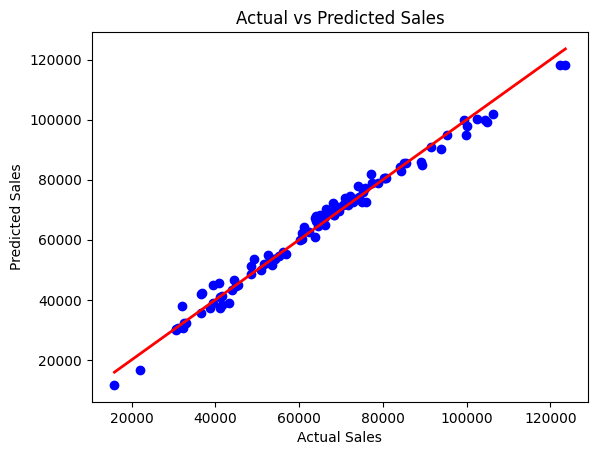

In [11]:
# Plot actual vs predicted values
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect fit
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

#### The Impact of Including the City Variable
The inclusion of the **city** variable improved the model’s performance, as prices are affected by the geographical location. By **one-hot encoding** the city, we allowed the model to account for differences in prices patterns across regions.

### Examine the Residuals
#### Homoscedasticity Testing

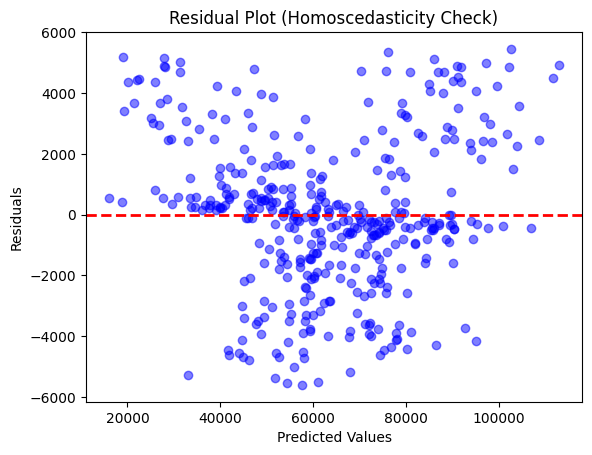

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Predict the target variable for the training set
y_train_pred = model.predict(X_train)

# Calculate residuals
residuals = y_train - y_train_pred

# Plot residuals vs. predicted values
plt.scatter(y_train_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Homoscedasticity Check)")
plt.show()

#### Normality Testing

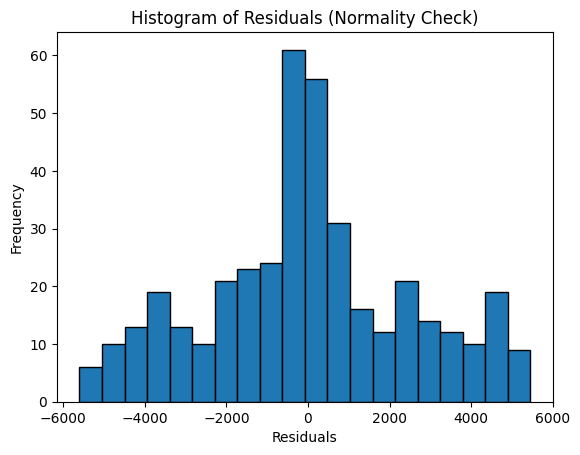

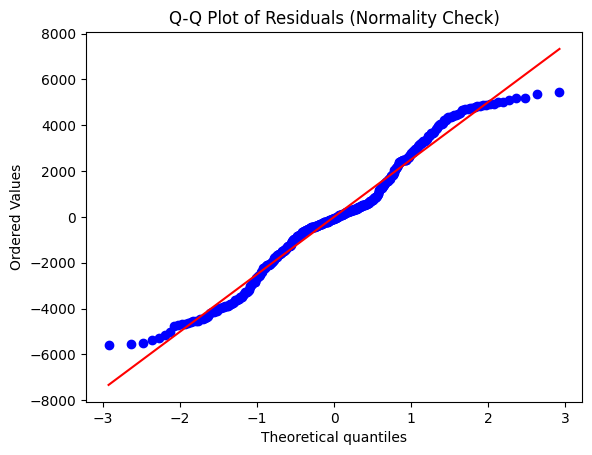

In [13]:
import scipy.stats as stats

# Histogram of residuals
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Normality Check)")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Normality Check)")
plt.show()

#### Some Procedures to Enahnce Performce:
1. **Verify Data Quality**:
   - Check for missing values, outliers, and feature scaling.

2. **Examine Residual Patterns**:
   - Analyze residual vs. fitted plots, QQ plots, and check for autocorrelation.

3. **Check Model Fit and Complexity**:
   - Ensure the model form matches the data, add interaction or polynomial terms for non-linearity, or simplify to address overfitting.

4. **Address Multicollinearity**:
   - Use correlation matrices and Variance Inflation Factor (VIF) to detect and mitigate multicollinearity.

5. **Transform Variables**:
   - Apply log, square root, or Box-Cox transformations for non-linearity or variance instability.

6. **Diagnose and Handle Variance Instability**:
   - Use Weighted Least Squares (WLS) or Generalized Linear Models (GLMs) for heteroscedasticity.

7. **Evaluate Model Performance**:
   - Perform train/test split or cross-validation and use metrics like R², RMSE, or adjusted R².

8. **Validate Feature Importance**:
   - Select relevant features using statistical tests, domain knowledge, or techniques like Lasso regression.

9. **Explore Alternative Models**:
   - Try non-linear models (e.g., Random Forest, XGBoost), ensemble models, or regularized models like Ridge or Lasso regression.

10. **Test Assumptions**:
    - Validate linearity, normality of residuals, and independence of errors.

11. **Iterate and Reassess**:
    - Repeat diagnostics after each adjustment and validate on unseen data.